# YOLO
The goal of this notebook is to do transfer learning of Fishial´s already implemented YOLO model. We do this by using Ultralytics

In [6]:
!pip install ultralytics

In [7]:
from ultralytics import YOLO
import os
import requests
import logging
from zipfile import ZipFile
import pandas as pd
import torch
import cv2
import matplotlib.pyplot as plt
import copy
from IPython.display import Image, display

from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [8]:
DATA_DIR = "../data_csv/"
timor_leste_data_path = os.path.join(DATA_DIR, "timor-leste.csv") # Annotation info for ground truth
images_path = "../data_images/"

In [9]:
# Filter out relevant images
relevant_species = ['Alectis ciliaris', 'Aphareus rutilans', 'Caranx ignobilis', 'Caranx lugubris', 'Caranx melampygus', 'Caranx sexfasciatus', 'Chirocentrus dorab', 'Chirocentrus nudus', 'Decapterus macrosoma', 'Elagatis bipinnulata', 'Epinephelus maculatus', 'Epinephelus radiatus', 'Etelis carbunculus', 'Gymnocranius grandoculis', 'Katsuwonus pelamis', 'Lethrinus atkinsoni', 'Lethrinus erythracanthus', 'Lethrinus obsoletus', 'Lethrinus ornatus', 'Lutjanus bohar', 'Lutjanus fulviflamma', 'Lutjanus fulvus', 'Lutjanus gibbus', 'Lutjanus johnii', 'Lutjanus kasmira', 'Lutjanus rivulatus', 'Lutjanus russellii', 'Lutjanus timoriensis', 'Monotaxis grandoculis', 'Psettodes erumei', 'Rastrelliger kanagurta', 'Sardinella albella', 'Scolopsis lineata', 'Scolopsis vosmeri', 'Scomberoides lysan', 'Scomberomorus commerson', 'Seriola dumerili', 'Variola albimarginata']

# Read annotation info (Timor-leste)
df_tl_ann = pd.read_csv(timor_leste_data_path, encoding="utf-8-sig", header=0, skiprows=1)
df_tl_ann = df_tl_ann[["image_file", "catch_name_en", "Species_name", "Family"]]

# Filter by species in relevant_species
df_filtered = df_tl_ann[df_tl_ann["Species_name"].isin(relevant_species)]

# Keep only images that actually exist
existing_files = set(os.listdir(images_path))

df_filtered = df_filtered[df_filtered["image_file"].isin(existing_files)]

# Convert to list of filenames
filtered_images= df_filtered["image_file"].tolist()

print("Total annotated images:", len(df_tl_ann))
print("Relevant images", len(df_filtered))
print("Unique final JPGs:", len(set(filtered_images)))


Total annotated images: 603
Relevant images 248
Unique final JPGs: 217


In [19]:
# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="dataset/data.yaml",
    epochs=1,
    imgsz=640,
    device="cpu",
    patience=50
)

# Evaluate the model's performance on the validation set
metrics = model.val()

New https://pypi.org/project/ultralytics/8.3.235 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.234  Python-3.12.12 torch-2.9.1+cpu CPU (12th Gen Intel Core i5-12500)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimiz

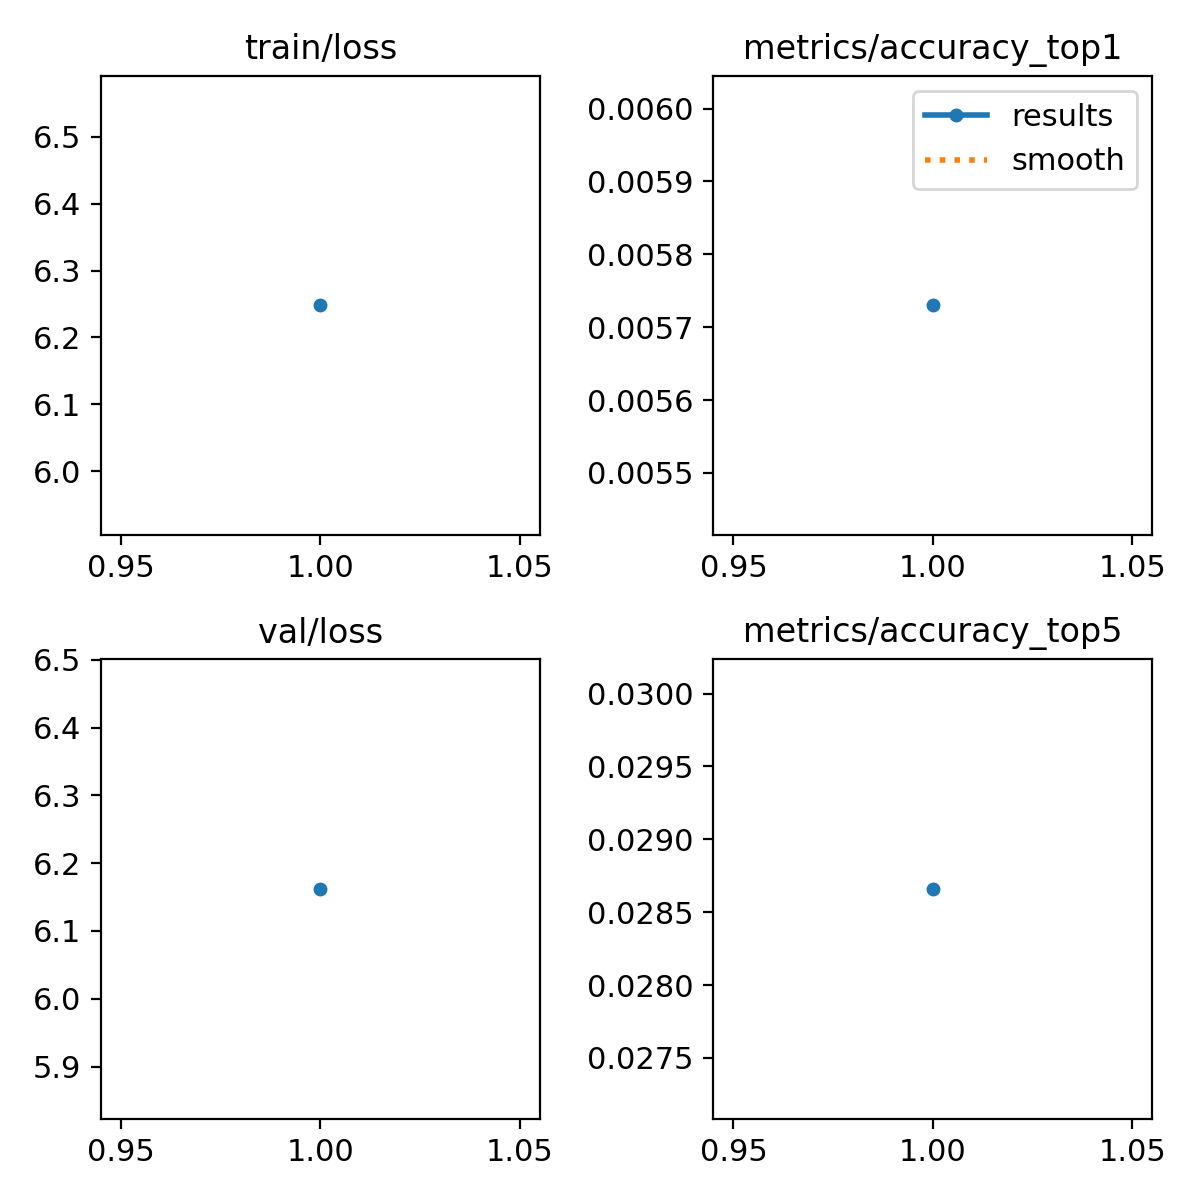

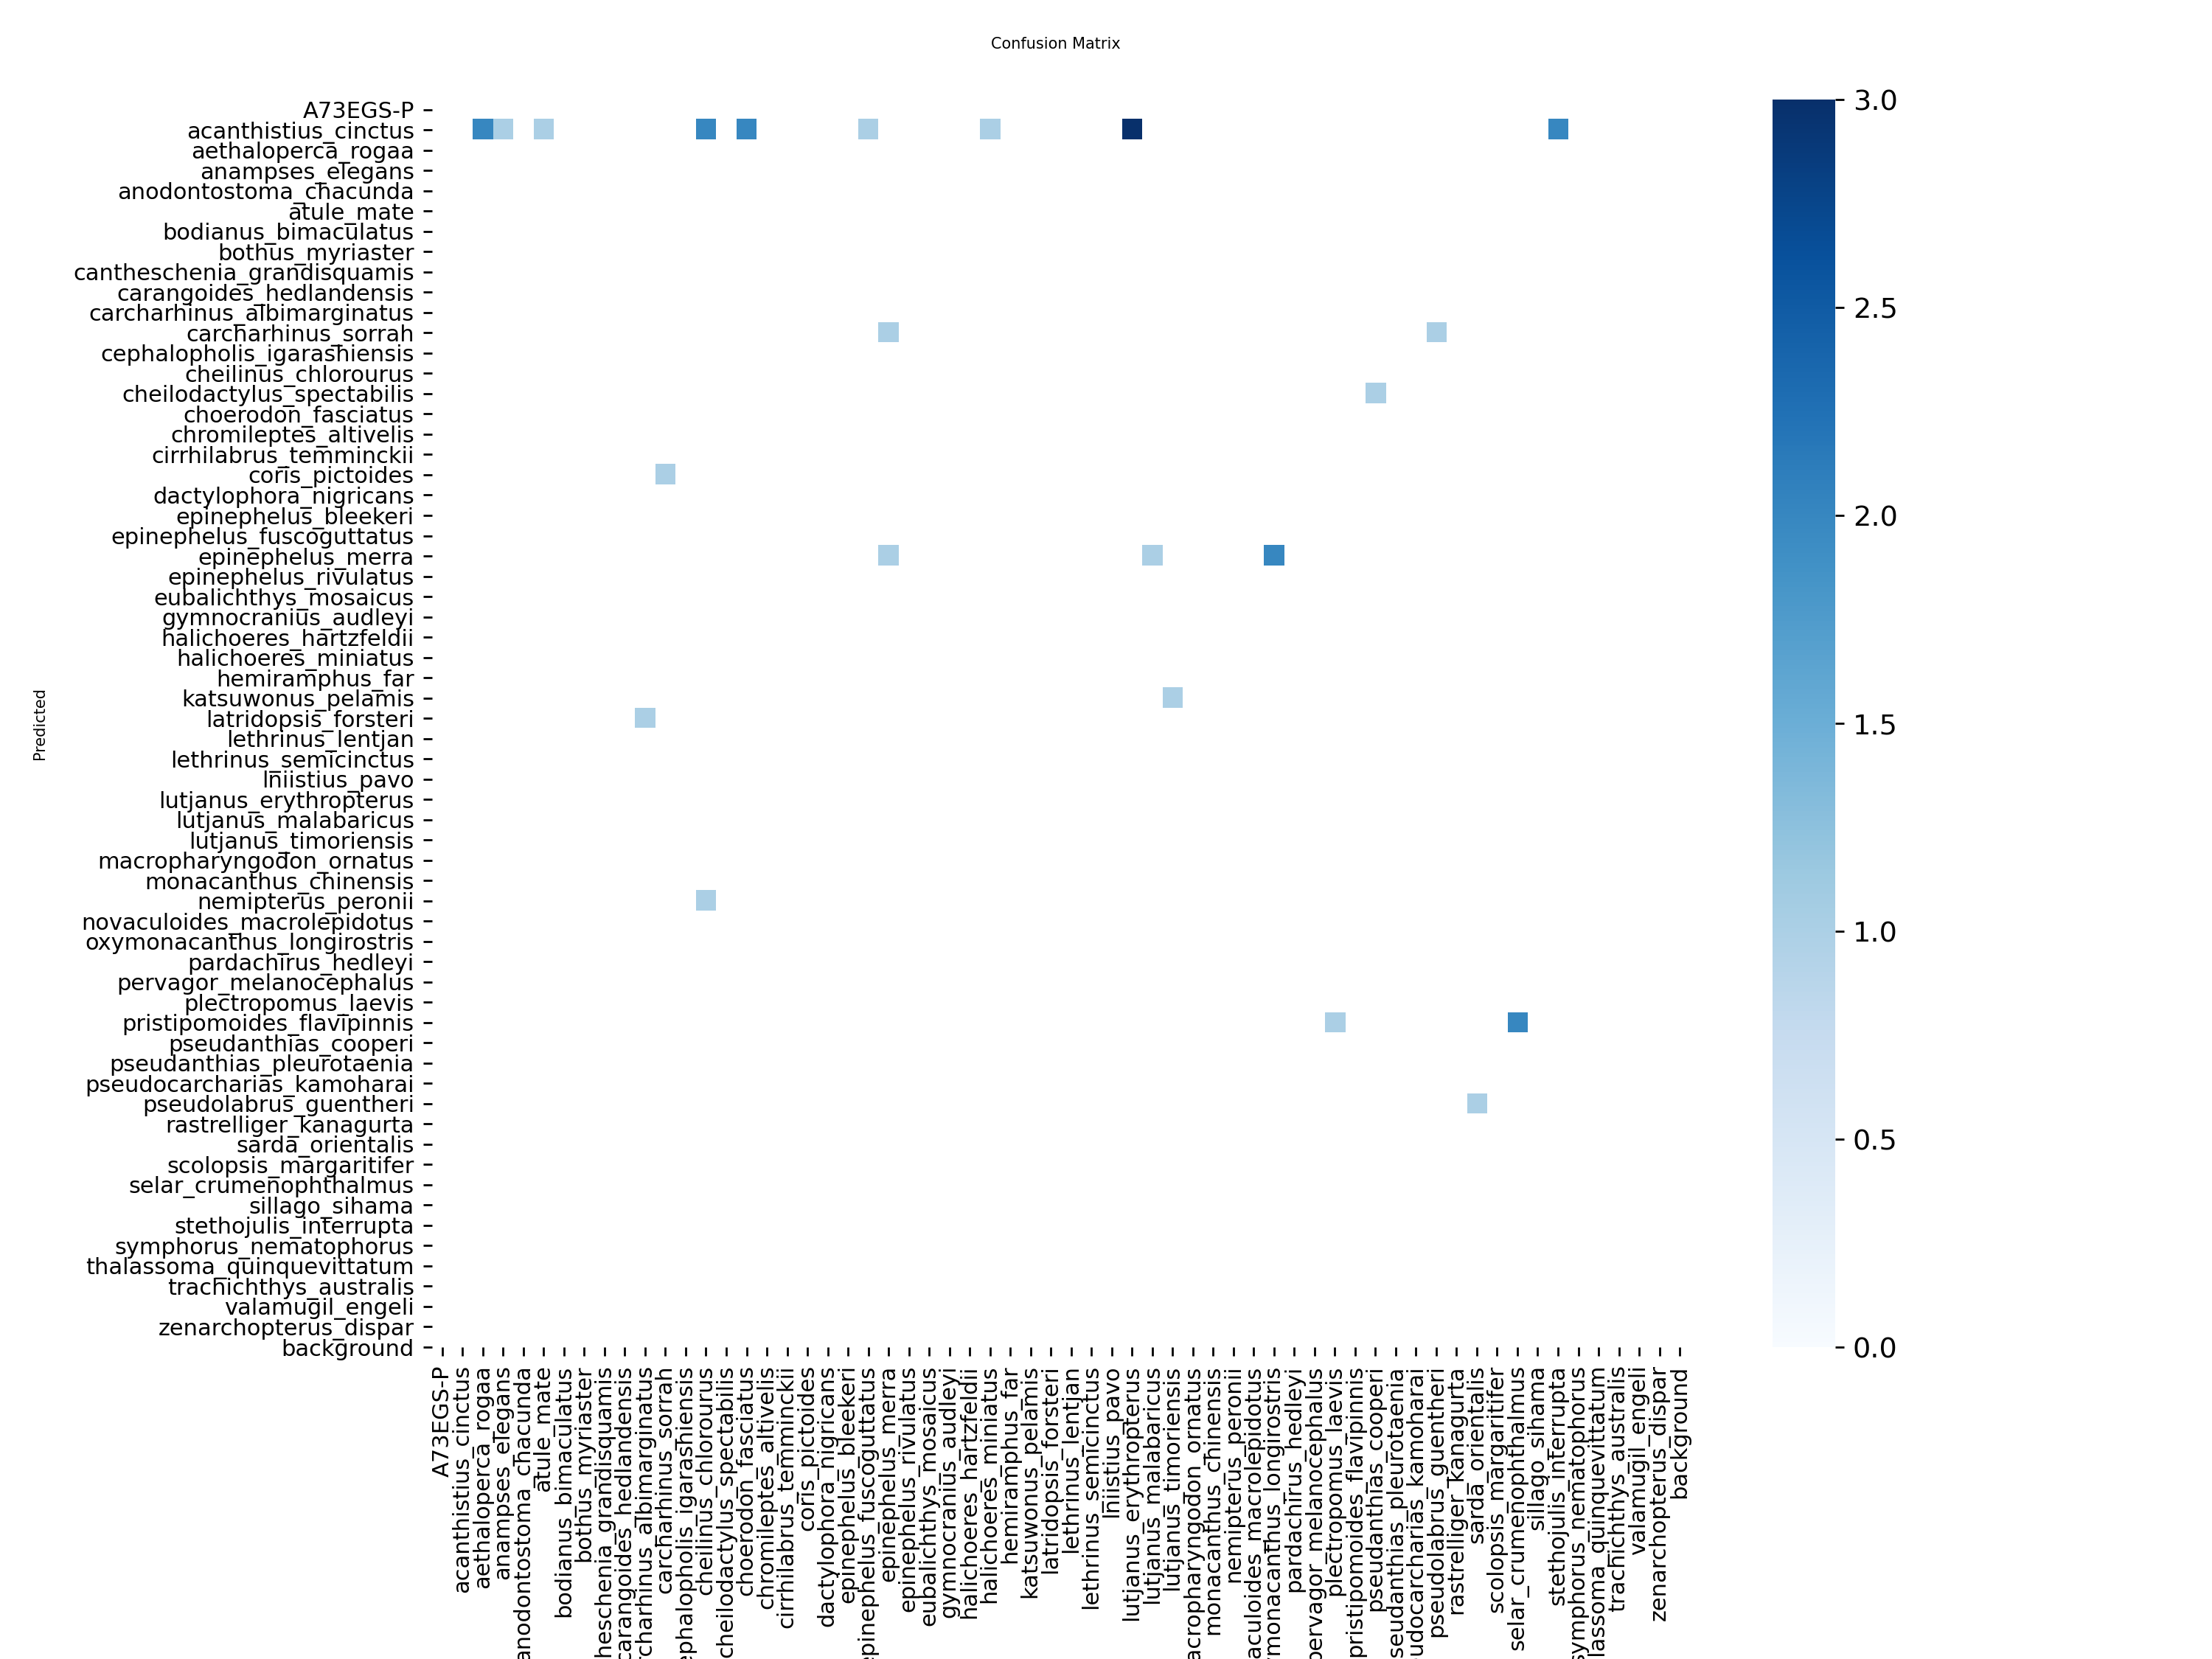

In [20]:
display(Image(filename="runs/classify/train/results.png"))
display(Image(filename="runs/classify/val/confusion_matrix.png"))

In [ ]:
import glob
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")  # your detection model

# Get the first 10 images from the folder
image_paths = sorted(glob.glob("../data_images/*"))[:10]

results = model.predict(
    source=image_paths,
    imgsz=640,
    conf=0.25,
    iou=0.45,
    save=True,
    save_txt=True
)

# Iterate through detections
for r in results:
    boxes = getattr(r, 'boxes', None)
    if boxes is None:
        print("Image:", r.path, "→ no detections")
        continue

    xyxy = boxes.xyxy.cpu().numpy()
    scores = boxes.conf.cpu().numpy()
    classes = boxes.cls.cpu().numpy()

    print("Image:", r.path)
    for (x1, y1, x2, y2), conf, cls in zip(xyxy, scores, classes):
        print(f"  {model.names[int(cls)]}: {conf:.2f}  box=({x1:.0f},{y1:.0f},{x2:.0f},{y2:.0f})")




0: 640x640 (no detections), 83.9ms
1: 640x640 (no detections), 83.9ms
2: 640x640 (no detections), 83.9ms
3: 640x640 (no detections), 83.9ms
4: 640x640 (no detections), 83.9ms
5: 640x640 (no detections), 83.9ms
6: 640x640 (no detections), 83.9ms
7: 640x640 (no detections), 83.9ms
8: 640x640 (no detections), 83.9ms
9: 640x640 (no detections), 83.9ms
Speed: 3.1ms preprocess, 83.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\kiennd\Desktop\Prosjektoppgave\yolo\runs\detect\predict
0 label saved to C:\Users\kiennd\Desktop\Prosjektoppgave\yolo\runs\detect\predict\labels
Image: ../data_images\1689120590238.jpg
Image: ../data_images\1689254343092.jpg
Image: ../data_images\1689379821579.jpg
Image: ../data_images\1689388044927.jpg
Image: ../data_images\1689388326411.jpg
Image: ../data_images\1689421223571.jpg
Image: ../data_images\1689556573003.jpg
Image: ../data_images\1689556897897.jpg
Image: ../data_images\1689557063983.jpg
Image: ../data_images